In [1]:
import plotly
import pyecharts
import matplotlib

import pandas as pd
import seaborn as sns

from pyecharts import Bar
from pyecharts import Line
from wordcloud import WordCloud

from matplotlib import pyplot as plt
%matplotlib inline

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [2]:
df = pd.read_csv('results.csv',encoding = 'gbk')

# How many people comment each year?
***
> **With the increase of Internet users and the promotion of douban, the number of comments should show a growing trend.**
***

In [3]:
df['年份'] = df['年份'].apply(int)
year2010 = df[(df['年份'] < 2011)]
year2011 = df[(df['年份'] > 2010) & (df['年份'] < 2012)]
year2012 = df[(df['年份'] > 2011) & (df['年份'] < 2013)]
year2013 = df[(df['年份'] > 2012) & (df['年份'] < 2014)]
year2014 = df[(df['年份'] > 2013) & (df['年份'] < 2015)]
year2015 = df[(df['年份'] > 2014) & (df['年份'] < 2016)]
year2016 = df[(df['年份'] > 2015) & (df['年份'] < 2017)]
year2017 = df[(df['年份'] > 2016) & (df['年份'] < 2018)]
year2018 = df[(df['年份'] > 2017)]

In [4]:
df_year = pd.DataFrame({'年份': ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
                        '评价总人数':[year2010['评价人数'].sum(),
                                 year2011['评价人数'].sum(),
                                 year2012['评价人数'].sum(),
                                 year2013['评价人数'].sum(),
                                 year2014['评价人数'].sum(),
                                 year2015['评价人数'].sum(),
                                 year2016['评价人数'].sum(),
                                 year2017['评价人数'].sum(),
                                 year2018['评价人数'].sum()]})

In [5]:
df_year

,年份,评价总人数
0,2010,484597
1,2011,819643
2,2012,482647
3,2013,627823
4,2014,950080
5,2015,1207408
6,2016,1408464
7,2017,3052331
8,2018,2214675


In [12]:
attr = df_year.年份
v1 = df_year.评价总人数
bar = Bar("2010年代各年评价总人数")
bar.add("评价总人数", attr, v1, mark_line = ["average"], label_color = ['#FFDAB9'])

bar

***
> **The results are generally in line with the growth trend, but 11 and 17 years are more prominent, so we took out 17 years and tried to analyze the reasons for this phenomenon.**
***

In [7]:
top10 = year2017.sort_values(by = '评价人数', ascending = False).head(10)

In [8]:
top10

,排名,电视剧名称,年份,评分,评价人数,导演,编剧,主演,类型,集数,单集片长,豆瓣网址
10,11,白夜追凶,2017,9.0,244112,王伟,指纹 / 顾小白,潘粤明 / 王泷正 / 梁缘 / 吕晓霖 / 尹姝贻,剧情 / 悬疑 / 犯罪,32,45,https://movie.douban.com/subject/26883064/
66,67,人民的名义,2017,8.3,206583,李路,周梅森,陆毅 / 柯蓝 / 张丰毅 / 吴刚 / 许亚军,剧情 / 悬疑 / 犯罪,52,55,https://movie.douban.com/subject/26727273/
830,851,三生三世十里桃花,2017,6.4,123056,林玉芬 / 余翠华,弘伙 / 唐七,杨幂 / 赵又廷 / 张智尧 / 迪丽热巴 / 高伟光,剧情 / 爱情,58,45,https://movie.douban.com/subject/25975243/
2076,2108,漂亮的李慧珍,2017,3.1,108560,赵晨阳,卢至柔 / 杨青,迪丽热巴 / 盛一伦 / 李溪芮 / 张彬彬 / 王骁,喜剧 / 爱情,40,43,https://movie.douban.com/subject/26752700/
2103,2135,深夜食堂,2017,2.8,104170,蔡岳勋 / 胡涵清,陈怡方,黄磊 / 赵又廷 / 张钧甯 / 海清 / 何炅,剧情,36,45,https://movie.douban.com/subject/26411410/
954,978,我的前半生,2017,6.2,101779,沈严,秦雯 / 亦舒,靳东 / 马伊_ / 袁泉 / 雷佳音 / 吴越,剧情 / 家庭,42,45,https://movie.douban.com/subject/26358696/
1324,1355,猎场,2017,5.5,88272,姜伟,姜伟,胡歌 / 菅纫姿 / 陈龙 / 孙红雷 / 张嘉译,剧情,52,45,https://movie.douban.com/subject/26322642/
39,40,琅琊榜之风起长林,2017,8.5,87108,孔笙 / 李雪,海宴,黄晓明 / 刘昊然 / 佟丽娅 / 张慧雯 / 梅婷,剧情 / 古装,50,45,https://movie.douban.com/subject/26665065/
113,114,大军师司马懿之军师联盟,2017,8.1,80227,张永新,常江,吴秀波 / 刘涛 / 李晨 / 于和伟 / 张钧甯,剧情 / 爱情 / 战争 / 古装,42,45,https://movie.douban.com/subject/26605881/
25,26,你好，旧时光,2017,8.7,80043,沙漠,八月长安 / 卓越泡沫 / 赵_ / 陈潇骁 / 陆洋 / 邓珂 / 潘可唯 / 张紫微 ...,李兰迪 / 张新成 / 周澄奥 / 李牵 / 许梦圆,剧情 / 爱情,30,45,https://movie.douban.com/subject/26581830/


# What are the top 10 hottest TV shows of 2017?
***
> **The number of evaluators can reflect the heat, and the score can reflect the reputation. We use these two parameters to form the scatter diagram.**
***

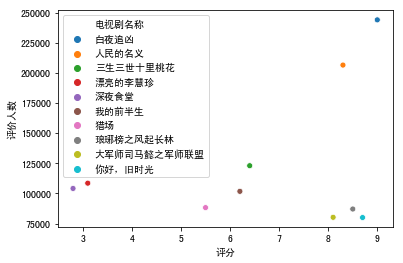

In [9]:
axes = sns.scatterplot(x = '评分', y = '评价人数', hue = '电视剧名称', data = top10)

***
> **We found that the prominence of 2017 is due to the emergence of several TV series that have caused heated discussions, but these TV series are also divided into good and bad.**
>> **'深夜食堂' and '漂亮的李慧珍' have attracted extensive comments from netizens, but their scores are very low. Obviously, it's not uncommon for embarrassing, bad shows to get good ratings these days.**
***
>> **But there are also some good TV series with high popularity and high reputation like '白夜追凶' and '人民的名义'. At the same time, the most popular TV series '白夜追凶' in 2017 is an online drama. It can be seen that people are gradually turning to the Internet in the way of watching TV series.**
***

In [10]:
styles = []
for i in df['类型'].fillna(''):
    style = i.strip().split(' / ')
    for j in style:
        styles.append(j)
tmp = pd.DataFrame({'styles': styles})
tmp = tmp[tmp['styles'] != '']

# What kind of TV series were most popular in the 10's?
***
> **From the types of TV series played, we can roughly see what kind of TV series are popular with the public.**
***

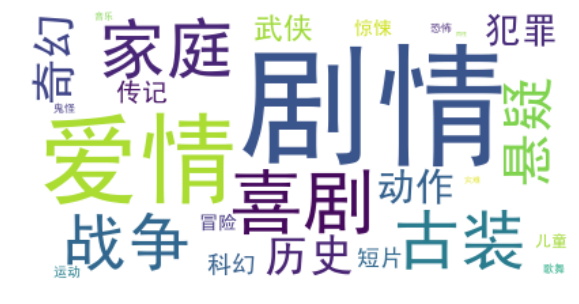

In [13]:
x = tmp['styles'].value_counts()
wc = WordCloud(background_color = 'white', font_path = 'SimHei.ttf', max_words = 1000, max_font_size = 100, random_state = 20) #msyh
wc.generate_from_frequencies(x)
plt.figure(figsize=(15, 5))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

***
> **As a result, drama, romance and comedy still dominate TV series**
***

In [14]:
fss = []
for i in range(2143):
    fs = (df['主演'][i].split(' / '), df['评分'][i])
    rw = []
    for f in fs[0]:
        rw.append((f,fs[1]))
    fss += rw

names = {}
for fs in fss:
    if names.get(fs[0]) == None:
        names[fs[0]] = [fs[1], 1]
    else:
        names[fs[0]][0] += fs[1]
        names[fs[0]][1] += 1
        
for value in names.values():
    value[0] = round(value[0] / value[1], 2)
    
pop_name_list = []
for item in names.items():
    if item[1][1] < 3: 
        pop_name_list.append(item[0])
        
for name in pop_name_list:
    names.pop(name)
    
yypm = sorted(names.items(), key=lambda d:d[1], reverse = True) 

ac_score = []
ac_freq = []
ac_name = []

for y in yypm:
    ac_score.append(y[1][0])
    ac_freq.append(y[1][1])
    
for y in yypm:
    ac_name.append(y[0])
    
mydata = pd.DataFrame({'演员':ac_name,
                      '平均分':ac_score,
                      '部数':ac_freq})

# Who are the actors in the top 20 and the last 20 in the 10's?
***
> **We can get a list of the top 20 and the last 20 actors, and how many TV shows they participated in.**
***

In [15]:
top20 = mydata.head(20)
last20 = mydata.tail(20)

In [16]:
top20

,演员,平均分,部数
0,杨新鸣,8.23,3
1,刘昊然,8.23,3
2,邵庄,8.22,6
3,邢冬冬,8.19,7
4,阎娜,8.10,4
5,王全有,8.10,3
6,杨羽,8.06,9
7,安宁,7.94,8
8,顾宇峰,7.90,3
9,李雪健,7.88,6


In [17]:
last20

,演员,平均分,部数
1071,江祖平,4.00,3
1072,牟星,3.97,4
1073,田亮,3.95,4
1074,王骏毅,3.93,3
1075,姜潮,3.92,4
1076,胡洋,3.83,3
1077,陈学冬,3.83,3
1078,张卫健,3.83,3
1079,周知,3.80,3
1080,马诗红,3.77,3


In [18]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

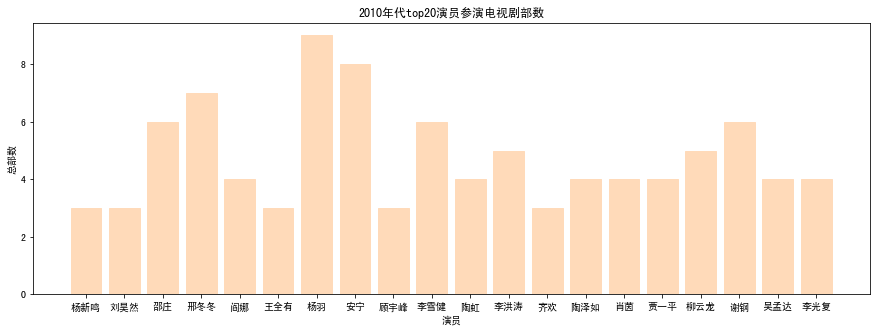

In [19]:
fig = plt.figure(figsize=(15,5)) 
plt.bar(top20['演员'], top20['部数'], color = '#FFDAB9', edgecolor = '#FFDAB9') 

plt.title('2010年代top20演员参演电视剧部数')
plt.xlabel('演员')
plt.ylabel('总部数')
plt.show()

***
> **As can be seen from the table, the actor who scored the top is generally older, but there are also many new generations of actors like '刘昊然'.**
***
> **'杨羽' starred in 9 TV series can still maintain a fairly high score, it can be described as old bones.**
***

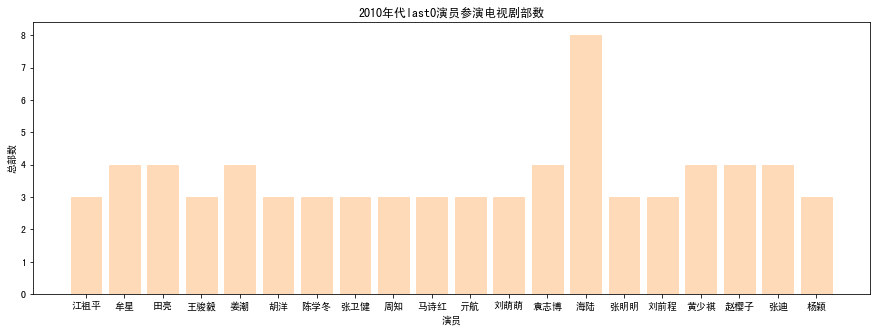

In [20]:
fig = plt.figure(figsize=(15,5)) 
plt.bar(last20['演员'], last20['部数'], color = '#FFDAB9', edgecolor = '#FFDAB9') 

plt.title('2010年代last0演员参演电视剧部数') 
plt.xlabel('演员')
plt.ylabel('总部数')
plt.show()

***
> **Angelababy('杨颖') is actually ranked last, it seems that everyone has a consistent comment on her acting.**
***
> **'海陆' starred in a lot of TV series, but the score is not satisfactory, perhaps the new Pearl Princess gave everyone a bad impression, I hope she will continue to work hard!**
***